rho = 0.1, log likelihood = -83.29
rho = 1, log likelihood = -37.75
rho = 10, log likelihood = -41.71
rho = 100, log likelihood = -43.76


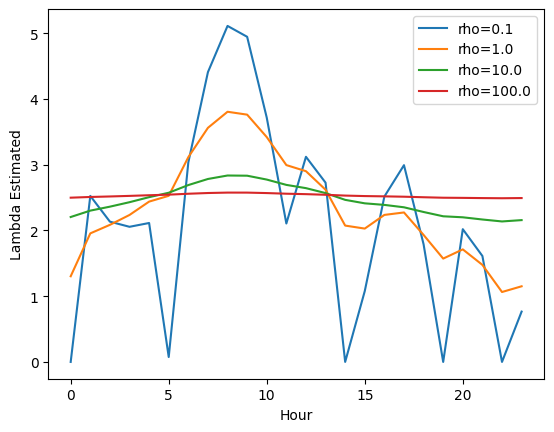

In [15]:
# Import necessary libraries
import numpy as np
import cvxpy as cvx
import matplotlib.pyplot as plt
from scipy.special import factorial

# Define the observed data
N = np.array([0, 4, 2, 2, 3, 0, 4, 5, 6, 6, 4, 1, 4, 4, 0, 1, 3, 4, 2, 0, 3, 2, 0, 1])

# Create a parameter for regularization
rho = cvx.Parameter(nonneg=True)

# Create a variable for optimization
lambd = cvx.Variable(24, nonneg=True)

# Define the optimization objective function
objective = cvx.sum(lambd) - N@cvx.log(lambd) + rho * (lambd[0] - lambd[-1])**2 + rho * cvx.sum_squares(cvx.diff(lambd))
problem = cvx.Problem(cvx.Minimize(objective))

# Store the optimized lambda values for different rho values
lambdas = []

# Iterate through different values of rho
for v in [0.1, 1, 10, 100]:
    rho.value = v
    problem.solve()

    # Plot the results
    plt.plot(np.arange(24), lambd.value, label="rho=%0.1f" % v)

    # Store the optimized lambda values
    lambdas.append(lambd.value)

# Set x-axis and y-axis labels
plt.xlabel('Hour')
plt.ylabel('Lambda Estimated')
# Display legends in the plot
plt.legend()


# Evaluate and print the log likelihood for each rho value
for v, lambd in zip([0.1, 1, 10, 100], lambdas):
    temp = np.sum(np.log(
        np.exp(-lambd) * lambd**np.array([0, 1, 3, 2, 3, 1, 4, 5, 3, 1, 4, 3,
                          5, 5, 2, 1, 1, 1, 2, 0, 1, 2, 1, 0]) /\
         factorial(np.array([0, 1, 3, 2, 3, 1, 4, 5, 3, 1, 4, 3,
                          5, 5, 2, 1, 1, 1, 2, 0, 1, 2, 1, 0]))
        ))
    print(f"rho = {v}, log likelihood = {temp:.2f}")



In [ ]:
from google.colab import drive
drive.mount('/content/drive')